In [ ]:
!pip install matplotlib==3.4.2

     |████████████████████████████████| 10.3 MB 3.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("/content/kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,0
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,0
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,0
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,0
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,0


In [ ]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
data['classification'].value_counts()

0    250
1    150
Name: classification, dtype: int64

#Getting Shape Of Data


In [ ]:
data.shape

(400, 26)

In [ ]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

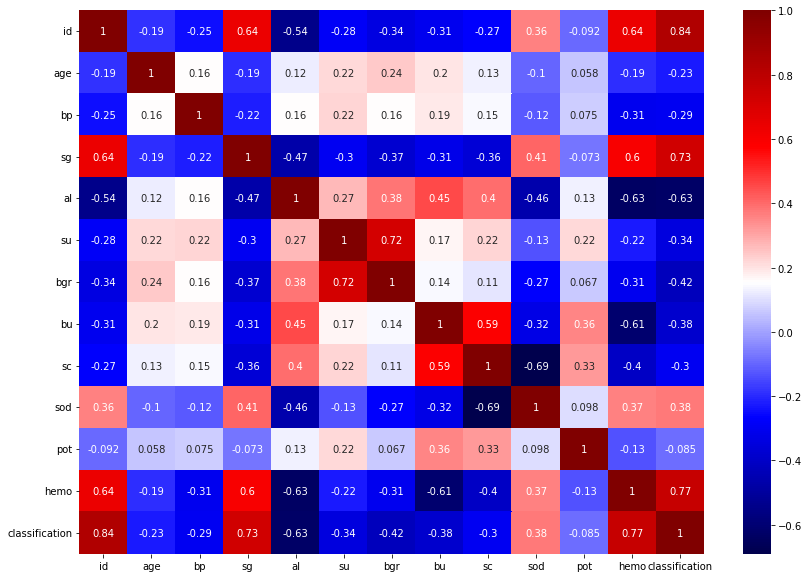

In [ ]:

corr = data.corr()
plt.figure(figsize = (14,10))
sns.heatmap(corr, annot = True, cmap = "seismic");

#Information of dataset contents


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

#Columns with categorical values

In [ ]:
categorial_cols = [col for col in data.columns if data[col].dtype=="object"]
categorial_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

#Columns with numerical values

In [ ]:
numerical_cols = [x for x in data.columns if not x in categorial_cols]
numerical_cols

['id',
 'age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'classification']

In [ ]:
for i in ['rc','wc','pcv']:
    data[i] = data[i].str.extract('(\d+)').astype(float)

#Filling null values with mean value

In [ ]:
# for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
#     data[i].fillna(data[i].mean(),inplace=True)

In [ ]:
# data = data.interpolate()

In [ ]:
data=data.dropna()

#Converting the categorial data by using oneHot Encoding

In [ ]:
rbc = pd.get_dummies(data[["rbc"]],drop_first=True)
rbc.head()

,rbc_normal
3,1
9,0
11,0
14,1
20,0


In [ ]:
pc = pd.get_dummies(data[["pc"]],drop_first=True)
pc.head()

,pc_normal
3,0
9,0
11,0
14,0
20,0


In [ ]:
pcc = pd.get_dummies(data[["pcc"]],drop_first=True)
pcc.head()

,pcc_present
3,1
9,1
11,1
14,1
20,0


In [ ]:
ba = pd.get_dummies(data[["ba"]],drop_first=True)
ba.head()

,ba_present
3,0
9,0
11,0
14,1
20,0


In [ ]:
#dropping the categorial data columns
data.drop(["rbc","pc","pcc","ba"],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    float64
 2   bp              158 non-null    float64
 3   sg              158 non-null    float64
 4   al              158 non-null    float64
 5   su              158 non-null    float64
 6   bgr             158 non-null    float64
 7   bu              158 non-null    float64
 8   sc              158 non-null    float64
 9   sod             158 non-null    float64
 10  pot             158 non-null    float64
 11  hemo            158 non-null    float64
 12  pcv             158 non-null    float64
 13  wc              158 non-null    float64
 14  rc              158 non-null    float64
 15  htn             158 non-null    object 
 16  dm              158 non-null    object 
 17  cad             158 non-null    obj

In [ ]:
data.shape

(158, 22)

#Concating the data columns

In [ ]:
data = pd.concat([data,rbc,pc,pcc,ba],axis=1)

In [ ]:
data.shape

(158, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    float64
 2   bp              158 non-null    float64
 3   sg              158 non-null    float64
 4   al              158 non-null    float64
 5   su              158 non-null    float64
 6   bgr             158 non-null    float64
 7   bu              158 non-null    float64
 8   sc              158 non-null    float64
 9   sod             158 non-null    float64
 10  pot             158 non-null    float64
 11  hemo            158 non-null    float64
 12  pcv             158 non-null    float64
 13  wc              158 non-null    float64
 14  rc              158 non-null    float64
 15  htn             158 non-null    object 
 16  dm              158 non-null    object 
 17  cad             158 non-null    obj

In [ ]:
data["classification"].value_counts()

1    115
0     43
Name: classification, dtype: int64

In [ ]:
data["appet"].value_counts()

good    139
poor     19
Name: appet, dtype: int64

In [ ]:
data.replace({"good":1,"poor":0},inplace=True)

In [ ]:
data.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,dm,cad,appet,pe,ane,classification,rbc_normal,pc_normal,pcc_present,ba_present
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,no,no,0,yes,yes,0,1,0,1,0
9,9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,...,yes,no,0,no,yes,0,0,0,1,0
11,11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,...,yes,no,0,yes,no,0,0,0,1,0
14,14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,...,yes,yes,0,yes,no,0,1,0,1,1
20,20,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,...,yes,yes,0,yes,yes,0,0,0,0,0


In [ ]:
data["ane"].value_counts()

no     142
yes     16
Name: ane, dtype: int64

In [ ]:
data.replace({"no":0,"yes":1,"\tno":0,"\tyes":1," yes":1},inplace=True)

In [ ]:
data["ane"].value_counts()

0    142
1     16
Name: ane, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    float64
 2   bp              158 non-null    float64
 3   sg              158 non-null    float64
 4   al              158 non-null    float64
 5   su              158 non-null    float64
 6   bgr             158 non-null    float64
 7   bu              158 non-null    float64
 8   sc              158 non-null    float64
 9   sod             158 non-null    float64
 10  pot             158 non-null    float64
 11  hemo            158 non-null    float64
 12  pcv             158 non-null    float64
 13  wc              158 non-null    float64
 14  rc              158 non-null    float64
 15  htn             158 non-null    int64  
 16  dm              158 non-null    int64  
 17  cad             158 non-null    int

#Frequent value in the column

In [ ]:
data=data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    float64
 2   bp              158 non-null    float64
 3   sg              158 non-null    float64
 4   al              158 non-null    float64
 5   su              158 non-null    float64
 6   bgr             158 non-null    float64
 7   bu              158 non-null    float64
 8   sc              158 non-null    float64
 9   sod             158 non-null    float64
 10  pot             158 non-null    float64
 11  hemo            158 non-null    float64
 12  pcv             158 non-null    float64
 13  wc              158 non-null    float64
 14  rc              158 non-null    float64
 15  htn             158 non-null    int64  
 16  dm              158 non-null    int64  
 17  cad             158 non-null    int

#Seperating the data for the model as X contains the data which feed to the model and y contains the target column 

In [ ]:
x = data.loc[:,['age', 'bp', 'rc','wc','appet','pc_normal','htn','hemo','bgr','dm','ane']]
y = data["classification"]

#Splitting the train data and test Data

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=1)
xtrain

,age,bp,rc,wc,appet,pc_normal,htn,hemo,bgr,dm,ane
375,70.0,80.0,5.0,9700.0,1,1,0,15.1,74.0,0,0
251,23.0,80.0,5.0,9800.0,1,1,0,17.0,70.0,0,0
367,68.0,60.0,6.0,6700.0,1,1,0,17.4,125.0,0,0
308,43.0,80.0,4.0,6900.0,1,1,0,13.9,81.0,0,0
296,41.0,70.0,5.0,6300.0,1,1,0,16.8,125.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
373,61.0,70.0,4.0,9200.0,1,1,0,13.7,133.0,0,0
377,64.0,70.0,4.0,6400.0,1,1,0,13.8,97.0,0,0
285,66.0,70.0,5.0,5300.0,1,1,0,16.0,94.0,0,0
382,48.0,80.0,6.0,6000.0,1,1,0,16.8,75.0,0,0


In [ ]:
xtest

,age,bp,rc,wc,appet,pc_normal,htn,hemo,bgr,dm,ane
189,64.0,60.0,3.0,7500.0,0,0,1,9.5,239.0,1,0
342,44.0,60.0,6.0,7700.0,1,1,0,15.0,95.0,0,0
91,56.0,70.0,5.0,12500.0,1,1,0,16.1,210.0,0,0
304,33.0,80.0,4.0,6200.0,1,1,0,13.1,128.0,0,0
362,33.0,80.0,4.0,10300.0,1,1,0,15.0,89.0,0,0
130,50.0,90.0,2.0,16300.0,0,0,0,8.2,128.0,0,1
286,71.0,70.0,6.0,9800.0,1,1,0,14.7,81.0,0,0
76,48.0,80.0,4.0,6200.0,1,0,0,10.3,133.0,1,0
246,48.0,110.0,2.0,5000.0,1,1,1,8.6,106.0,0,1
325,58.0,80.0,6.0,6700.0,1,1,0,14.0,100.0,0,0


# Min-max


In [ ]:
X_train=xtrain
y_train=ytrain
X_test=xtest
y_test=ytest

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver='liblinear')

In [ ]:
# y=data[["Outcome"]]
# print(y)
x_train=xtrain
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)
logreg.fit(xtrain,ytrain)

LogisticRegression(solver='liblinear')

In [ ]:
logisticTestAccuracy=logreg.score(xtest,ytest)
logisticTrainAccuracy=logreg.score(xtrain,ytrain)
print(logisticTestAccuracy)
print(logisticTrainAccuracy)


0.96875
0.9920634920634921


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
lr_probs = logreg.predict_proba(xtest)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(ytest, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.995


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)

In [ ]:
Logpred=logreg.predict(xtest)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest,Logpred)
print(confusion_matrix)


[[ 9  1]
 [ 0 22]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(random_state=42)

In [ ]:
random.fit(xtrain,ytrain)

RandomForestClassifier(random_state=42)

In [ ]:
randomTestAccuracy=random.score(xtest,ytest)
randomTrainAccuracy=random.score(xtrain,ytrain)
print(randomTestAccuracy)
print(randomTrainAccuracy)

0.96875
1.0


In [ ]:
rf_probs = random.predict_proba(xtest)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(ytest, rf_probs)
print('Random: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
rf_fpr, rf_tpr, _ = roc_curve(ytest, rf_probs)

Random: ROC AUC=1.000


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
Randompred=random.predict(xtest)
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(ytest,Randompred)
print(confusion_matrix1)

[[ 9  1]
 [ 0 22]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:

for n_estimator in range(1,100):

  model7t = RandomForestClassifier(
                            n_estimators = n_estimator,
                            random_state = 42)
    
  model7t.fit(xtrain,ytrain)
  predictionclf7t = model7t.predict(xtest)
  treeTestAcct=accuracy_score(ytest,predictionclf7t)
  treeTrainAcct=model7t.score(xtrain,ytrain)
  print("For estimator : ",n_estimator)
  print("Training accuracy:")
  print(treeTrainAcct)
  print("Test accuracy:")
  print(treeTestAcct)

For estimator :  1
Training accuracy:
0.9920634920634921
Test accuracy:
0.96875
For estimator :  2
Training accuracy:
0.9920634920634921
Test accuracy:
0.96875
For estimator :  3
Training accuracy:
0.9920634920634921
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  4
Training accuracy:
0.9920634920634921
Test accuracy:
0.96875
For estimator :  5
Training accuracy:
0.9920634920634921
Test accuracy:
0.96875
For estimator :  6
Training accuracy:
0.9920634920634921
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  7
Training accuracy:
0.9920634920634921
Test accuracy:
0.96875
For estimator :  8
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  9
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  10
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  11
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  12
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  13
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  14
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  15
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  16
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  17
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  18
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  19
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  20

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"



Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  21
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  22
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  23
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  24
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  25
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  26
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  27
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  28
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  29
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  30
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  31
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  32
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  33
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  34
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  35
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  36
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  37
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  38
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  39
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  40
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  41
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  42
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  43
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  44
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  45
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  46
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  47
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  48
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  49
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  50
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  51
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  52
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  53
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  54
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  55
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  56
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  57
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  58
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  59
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  60
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  61
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  62
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  63
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  64
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  65
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  66
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  67
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  68
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  69
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  70
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  71
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  72
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  73
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  74
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  75
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  76
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  77
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  78
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  79
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  80
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  81
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  82
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  83
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  84
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  85
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  86
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  87
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  88
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  89
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  90
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  91
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  92
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  93
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  94
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  95
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  96
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  97
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  98
Training accuracy:
1.0
Test accuracy:
0.96875
For estimator :  99
Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# SVM

In [ ]:
 from sklearn.svm import SVC
 svm=SVC(probability=True,kernel='rbf')

In [ ]:
svm.fit(xtrain,ytrain)

SVC(probability=True)

In [ ]:
svmTestAccuracy=svm.score(xtest,ytest)
svmTrainAccuracy=svm.score(xtrain,ytrain)
print(svmTestAccuracy)
print(svmTrainAccuracy)


0.71875
0.8174603174603174


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
sb_probs = svm.predict_proba(xtest)
sb_probs = sb_probs[:, 1]
sb_auc = roc_auc_score(ytest, sb_probs)
print('Svm: ROC AUC=%.3f' % (sb_auc))
# calculate roc curves
sb_fpr, sb_tpr, _ = roc_curve(ytest, sb_probs)

Svm: ROC AUC=0.545


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
SVMpred=svm.predict(xtest)
from sklearn.metrics import confusion_matrix
confusion_matrix3 = confusion_matrix(ytest,SVMpred)
print(confusion_matrix3)

[[ 1  9]
 [ 0 22]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
neigh = KNeighborsClassifier()
neigh.fit(xtrain,ytrain)

KNeighborsClassifier()

In [ ]:
knTestAccuracy=neigh.score(xtest,ytest)
knTrainAccuracy=neigh.score(xtrain,ytrain)
print(knTestAccuracy)
print(knTrainAccuracy)

0.75
0.8571428571428571


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
KNNpred=neigh.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
kn_probs = neigh.predict_proba(xtest)
kn_probs = kn_probs[:, 1]
kn_auc = roc_auc_score(ytest, kn_probs)
print('Kn: ROC AUC=%.3f' % (kn_auc))
# calculate roc curves
kn_fpr, kn_tpr, _ = roc_curve(ytest, kn_probs)

Kn: ROC AUC=0.545


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# Decision tree

In [ ]:
from sklearn import tree


In [ ]:
clf6= tree.DecisionTreeClassifier(max_depth=16,max_features=10,splitter='best',
                       random_state=42)
clf6.fit(xtrain,ytrain)
predictionclf6 = clf6.predict(xtest)
treeTestAcc=accuracy_score(ytest,predictionclf6)
treeTrainAcc=clf6.score(xtrain,ytrain)
print("Training accuracy:")
print(treeTrainAcc)
print("Test accuracy:")
print(treeTestAcc)
print(confusion_matrix(ytest,predictionclf6))

Training accuracy:
1.0
Test accuracy:
0.96875
[[ 9  1]
 [ 0 22]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
dt_probs = clf6.predict_proba(xtest)
dt_probs = dt_probs[:, 1]
dt_auc = roc_auc_score(ytest, dt_probs)
print('Dicission tree: ROC AUC=%.3f' % (dt_auc))
# calculate roc curves
dt_fpr, dt_tpr, _ = roc_curve(ytest, dt_probs)

Dicission tree: ROC AUC=0.950


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# Extraa Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model7 = ExtraTreesClassifier(
                          n_estimators = 28,
                          random_state = 42)
  
model7.fit(xtrain,ytrain)
predictionclf7 = model7.predict(xtest)
etreeTestAcc=accuracy_score(ytest,predictionclf7)
etreeTrainAcc=model7.score(xtrain,ytrain)
print("Training accuracy:")
print(etreeTrainAcc)
print("Test accuracy:")
print(etreeTestAcc)

Training accuracy:
1.0
Test accuracy:
0.96875


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
ex_probs = model7.predict_proba(xtest)
ex_probs =ex_probs[:, 1]
ex_auc = roc_auc_score(ytest, ex_probs)
print('Extra tree: ROC AUC=%.3f' % (ex_auc))
# calculate roc curves
ex_fpr, ex_tpr, _ = roc_curve(ytest, ex_probs)

Extra tree: ROC AUC=1.000


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


**Extraa tree hyper perameter tuning**

# Comparison

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
x1 = np.array(["RandomForest ", "  Logistic Regression","Naive Bayes","SVM","kn"])
y1 = np.array([randomTrainAccuracy*100,logisticTrainAccuracy*100, gNBtrainAccuracy*100, svmTrainAccuracy*100,knTrainAccuracy*100])
plt.ylabel('Accuracy Scores')
plt.title('Acuracy Comparison')
plt.bar(x1,y1,color=['firebrick', 'green','blue','black','yellow'])
plt.legend()
plt.show()

NameError: ignored

<Figure size 640x480 with 0 Axes>

In [ ]:
!pip install matplotlib==3.4.2


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ["Logistic Regression", "  RandomForest","Extra Trees","SVM","KNN","Decision Tree"]
train = [round(logisticTrainAccuracy*100,2), round(randomTrainAccuracy*100,2), round(etreeTrainAcc*100,2), round(svmTrainAccuracy*100,2), round(knTrainAccuracy*100,2),round(treeTrainAcc*100,2)]
test = [round(logisticTestAccuracy*100,2), round(randomTestAccuracy*100,2), round(etreeTestAcc*100,2), round(svmTestAccuracy*100,2), round(knTestAccuracy*100,2),round(treeTestAcc*100,2)]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(25, 15))
rects1 = ax.bar(x - width/2, train, width, label='Train')
rects2 = ax.bar(x + width/2, test, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy',fontsize=40)
ax.set_xlabel('Algorithm',fontsize=40)
ax.set_title('Diabetes train and test data accuracy for 6 algorithm',fontsize=40)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.tick_params(axis='both', labelsize=35)
ax.bar_label(rects1, padding=3,fontsize=40)
ax.bar_label(rects2, padding=3,fontsize=40)

fig.tight_layout()
plt.legend(fontsize=40)
plt.show()

# Performance analysis

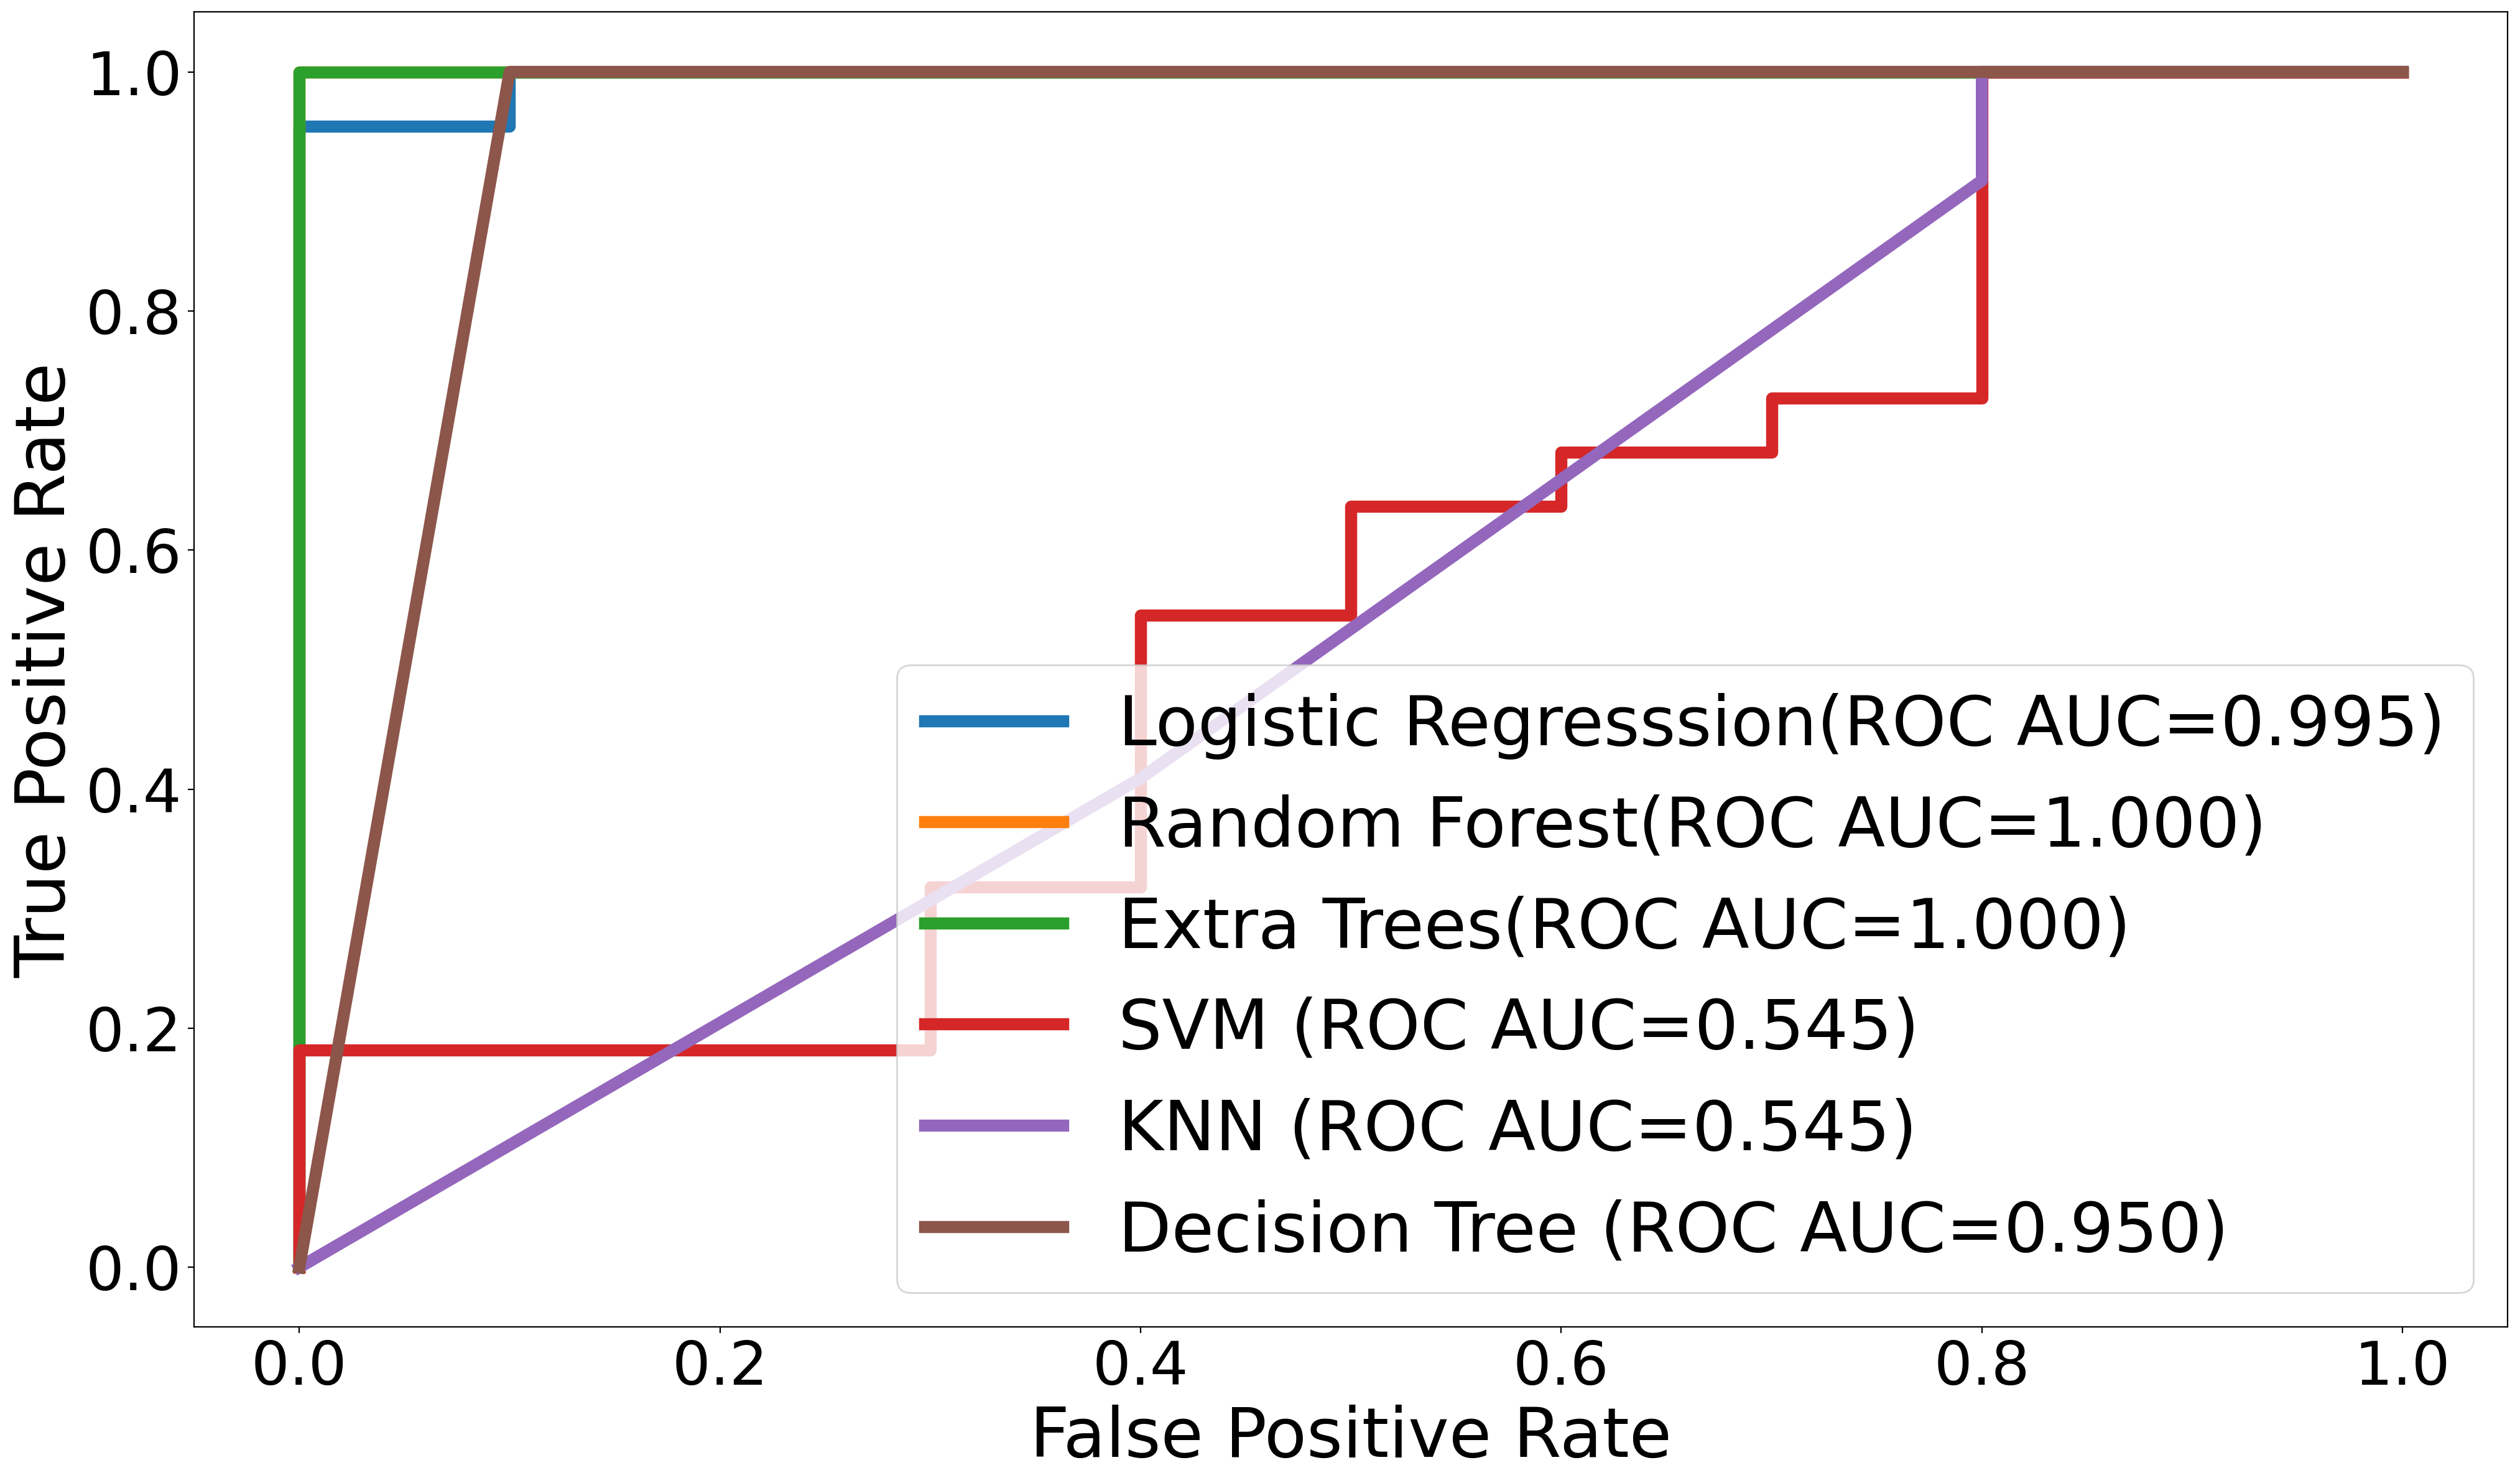

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure

figure(figsize=(24, 14), dpi=200)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regresssion(ROC AUC=%.3f)' % (lr_auc),linewidth=7.0)
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest(ROC AUC=%.3f)' % (rf_auc),linewidth=7.0)
pyplot.plot(ex_fpr, ex_tpr, marker='.', label='Extra Trees(ROC AUC=%.3f)' % (ex_auc),linewidth=7.0)
pyplot.plot(sb_fpr, sb_tpr, marker='.', label='SVM (ROC AUC=%.3f)' % (sb_auc),linewidth=7.0)
pyplot.plot(kn_fpr, kn_tpr, marker='.', label='KNN (ROC AUC=%.3f)' % (kn_auc),linewidth=7.0)
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (ROC AUC=%.3f)' % (dt_auc),linewidth=7.0)
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=40)
pyplot.ylabel('True Positive Rate',fontsize=40)
# show the legend
pyplot.tick_params(axis='both', labelsize=35)
pyplot.legend(fontsize=40)
# show the plot
pyplot.show()

# classification_report

In [ ]:
from sklearn.metrics import classification_report
print("Logistic Regration")
print(logisticTrainAccuracy)
print(logisticTestAccuracy)
print(classification_report(ytest,Logpred))
print("Random Forest")
print(randomTrainAccuracy)
print(randomTestAccuracy)
print(classification_report(ytest,Randompred))
print("Extraa Trees")
print(etreeTrainAcc)
print(etreeTestAcc)
print(classification_report(ytest,predictionclf7))
print("SVM")
print(svmTrainAccuracy)
print(svmTestAccuracy)
print(classification_report(ytest,SVMpred))
print("KNN")
print(knTrainAccuracy)
print(knTestAccuracy)
print(classification_report(ytest,KNNpred))
print("Dicicision Tree")
print(treeTrainAcc)
print(treeTestAcc)
print(classification_report(ytest,predictionclf6))

Logistic Regration
0.9920634920634921
0.96875
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.96      1.00      0.98        22

    accuracy                           0.97        32
   macro avg       0.98      0.95      0.96        32
weighted avg       0.97      0.97      0.97        32

Random Forest
1.0
0.96875
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.96      1.00      0.98        22

    accuracy                           0.97        32
   macro avg       0.98      0.95      0.96        32
weighted avg       0.97      0.97      0.97        32

Extraa Trees
1.0
0.96875
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.96      1.00      0.98        22

    accuracy                           0.97        32
   macro avg       0.98      0.

# Save Model

In [ ]:

import joblib


In [ ]:
joblib.dump(random,"kidney_detector_ex")

['kidney_detector_ex']

# Prediction

In [ ]:
np.save("xtrain_kidney.npy",xtrain)

# Lime

In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 4.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=410849816d4ef3add5f985d4db3f2073a65a5e9f7c9b67aa8645b2044475caf0
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(xtrain),
    feature_names=xtrain.columns,
    mode='classification'
)

In [ ]:
xtest

In [ ]:
exp = interpretor.explain_instance(
    data_row=xtest.iloc[20], ##new data
    predict_fn=random.predict_proba
)
exp.show_in_notebook(show_table=True, show_all=False)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [ ]:
!pip install shapash

     |████████████████████████████████| 899 kB 1.6 MB/s 
     |████████████████████████████████| 9.6 MB 47.1 MB/s 
     |████████████████████████████████| 564 kB 64.3 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 210 kB 52.1 MB/s 
     |████████████████████████████████| 1.0 MB 44.7 MB/s 
     |████████████████████████████████| 3.3 MB 40.1 MB/s 
     |████████████████████████████████| 642 kB 71.5 MB/s 
     |████████████████████████████████| 34.5 MB 9.2 kB/s 
     |████████████████████████████████| 357 kB 58.6 MB/s 
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013944 sha256=130739a8695436142b8fd466056ef0abb832f2bcadad207add6de9fd679ed29f
  Stored in directory: /root/.cache/pip/wheels/71/17/b0/8bebc086e55a01cf4036902b6ca05fce3fb4c7fd48dbd07717
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size=669714 sha256=bba31ae923b7b74bbb67facdd605c67077fef528412bf407e1c2191f93

In [ ]:
from shapash.explainer.smart_explainer import SmartExplainer

In [ ]:
xpl = SmartExplainer(model=random)

In [ ]:
xpl.compile(
    x=xtest,
   
)

In [ ]:
xpl.plot.features_importance(label=1)

In [ ]:
xpl.plot.compare_plot(row_num=[16, 20], label=1)